In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Import Libraries**

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split, cross_val_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

**2. Import Dataset**

In [ ]:
# lt_predict = pd.read_csv('/content/drive/MyDrive/AI Tech/Project 2022/Laptop_Prediction_200.csv')
# lt_predict = pd.read_csv('/content/drive/MyDrive/AI Tech/Project 2022/Laptop_Prediction_245.csv')
lt_predict = pd.read_csv('/content/drive/MyDrive/AI Tech/Project 2022/Laptop_Prediction_345.csv')
lt_predict = lt_predict.dropna()
lt_predict.head()

,No.,Brand,Series,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,1,Apple,MacBook Pro 16 Space Grey-32C GPU/32GB/2TB,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,2,Apple,MacBook Pro 16 Space Grey-32C GPU/32GB/1TB,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,3,Apple,MacBook Pro 16 Space Grey-16C GPU/16GB/1TB,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,4,Apple,MacBook Pro 16 Space Grey-16C GPU/16GB/512GB,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,5,Apple,MacBook Pro 14 Silver-16C GPU/16GB/2TB,1.6,31.26,22.12,1.55,14.2,IPS,3024x1964,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


**3. Data Preprocessing**

In [ ]:
lt_predict.drop(['No.',
                 'Series',
                 ], axis = 1, inplace = True)
lt_predict.head()

,Brand,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Display,Resolution,OS,CPU,GPU,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,Price(Baht)
0,Apple,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,2000,SSD,138900
1,Apple,2.2,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Max,Apple M1 Max 32-Core GPU,32,4.0,1000,SSD,124900
2,Apple,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,1000,SSD,96900
3,Apple,2.1,35.57,24.81,1.68,16.2,IPS,3456x2234,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,512,SSD,89900
4,Apple,1.6,31.26,22.12,1.55,14.2,IPS,3024x1964,macOS,Apple M1 Pro 10-Core,Apple M1 Pro 16-Core GPU,16,3.4,2000,SSD,103900


In [ ]:
gpu = pd.get_dummies(lt_predict['GPU'], drop_first = True)
lt_predict = pd.concat([lt_predict, gpu], axis = 1)

dp = pd.get_dummies(lt_predict['Display'], drop_first = True)
lt_predict = pd.concat([lt_predict, dp], axis = 1)

os = pd.get_dummies(lt_predict['OS'], drop_first = True)
lt_predict = pd.concat([lt_predict, os], axis = 1)

cpu = pd.get_dummies(lt_predict['CPU'], drop_first = True)
lt_predict = pd.concat([lt_predict, cpu], axis = 1)

brand = pd.get_dummies(lt_predict['Brand'], drop_first = True)
lt_predict = pd.concat([lt_predict, brand], axis = 1)

lt_predict.drop(['Display',
                 'GPU',
                 'OS',
                 'CPU',
                 'Brand'
                 ],axis = 1, inplace = True)
lt_predict.head()

,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Resolution,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,...,Intel Pentium Silver,Intel Pentium Sliver,Intel Xeon,Acer,Apple,DELL,HP,Huawei,Lenovo,MSI
0,2.2,35.57,24.81,1.68,16.2,3456x2234,32,4.0,2000,SSD,...,0,0,0,0,1,0,0,0,0,0
1,2.2,35.57,24.81,1.68,16.2,3456x2234,32,4.0,1000,SSD,...,0,0,0,0,1,0,0,0,0,0
2,2.1,35.57,24.81,1.68,16.2,3456x2234,16,3.4,1000,SSD,...,0,0,0,0,1,0,0,0,0,0
3,2.1,35.57,24.81,1.68,16.2,3456x2234,16,3.4,512,SSD,...,0,0,0,0,1,0,0,0,0,0
4,1.6,31.26,22.12,1.55,14.2,3024x1964,16,3.4,2000,SSD,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
cat_var =  ['Resolution',
            'StorageType'
            ]
def binary_map(x):
    return x.map({# Resolution 
                  '4096x2160': 15, '3840x2400': 14, '3840x2160': 13, '3456x2234': 12, '3456x2160': 11, '3072x1920': 10, '3024x1964': 9, '3000x2000': 8, '2880x1800': 7, '2560x1600': 6, '2560x1440': 5, '2520x1680': 4, '2160x1440': 3, '1920x1200': 2, '1920x1080': 1, '1366x768': 0,
                  # StorageType
                  'SSD': 2, 'HDD': 1, 'eMMC': 0
                  })

lt_predict[cat_var] = lt_predict[cat_var].apply(binary_map)
lt_predict.head()

,Weight(kg),Width(cm),Depth(cm),Height(cm),Screen Size(inch),Resolution,RAM(GB),Processor Speed(GHz),Storage(GB),StorageType,...,Intel Pentium Silver,Intel Pentium Sliver,Intel Xeon,Acer,Apple,DELL,HP,Huawei,Lenovo,MSI
0,2.2,35.57,24.81,1.68,16.2,12,32,4.0,2000,2,...,0,0,0,0,1,0,0,0,0,0
1,2.2,35.57,24.81,1.68,16.2,12,32,4.0,1000,2,...,0,0,0,0,1,0,0,0,0,0
2,2.1,35.57,24.81,1.68,16.2,12,16,3.4,1000,2,...,0,0,0,0,1,0,0,0,0,0
3,2.1,35.57,24.81,1.68,16.2,12,16,3.4,512,2,...,0,0,0,0,1,0,0,0,0,0
4,1.6,31.26,22.12,1.55,14.2,9,16,3.4,2000,2,...,0,0,0,0,1,0,0,0,0,0


Text(0.5, 1.0, 'Laptop Price Variables Correlation')

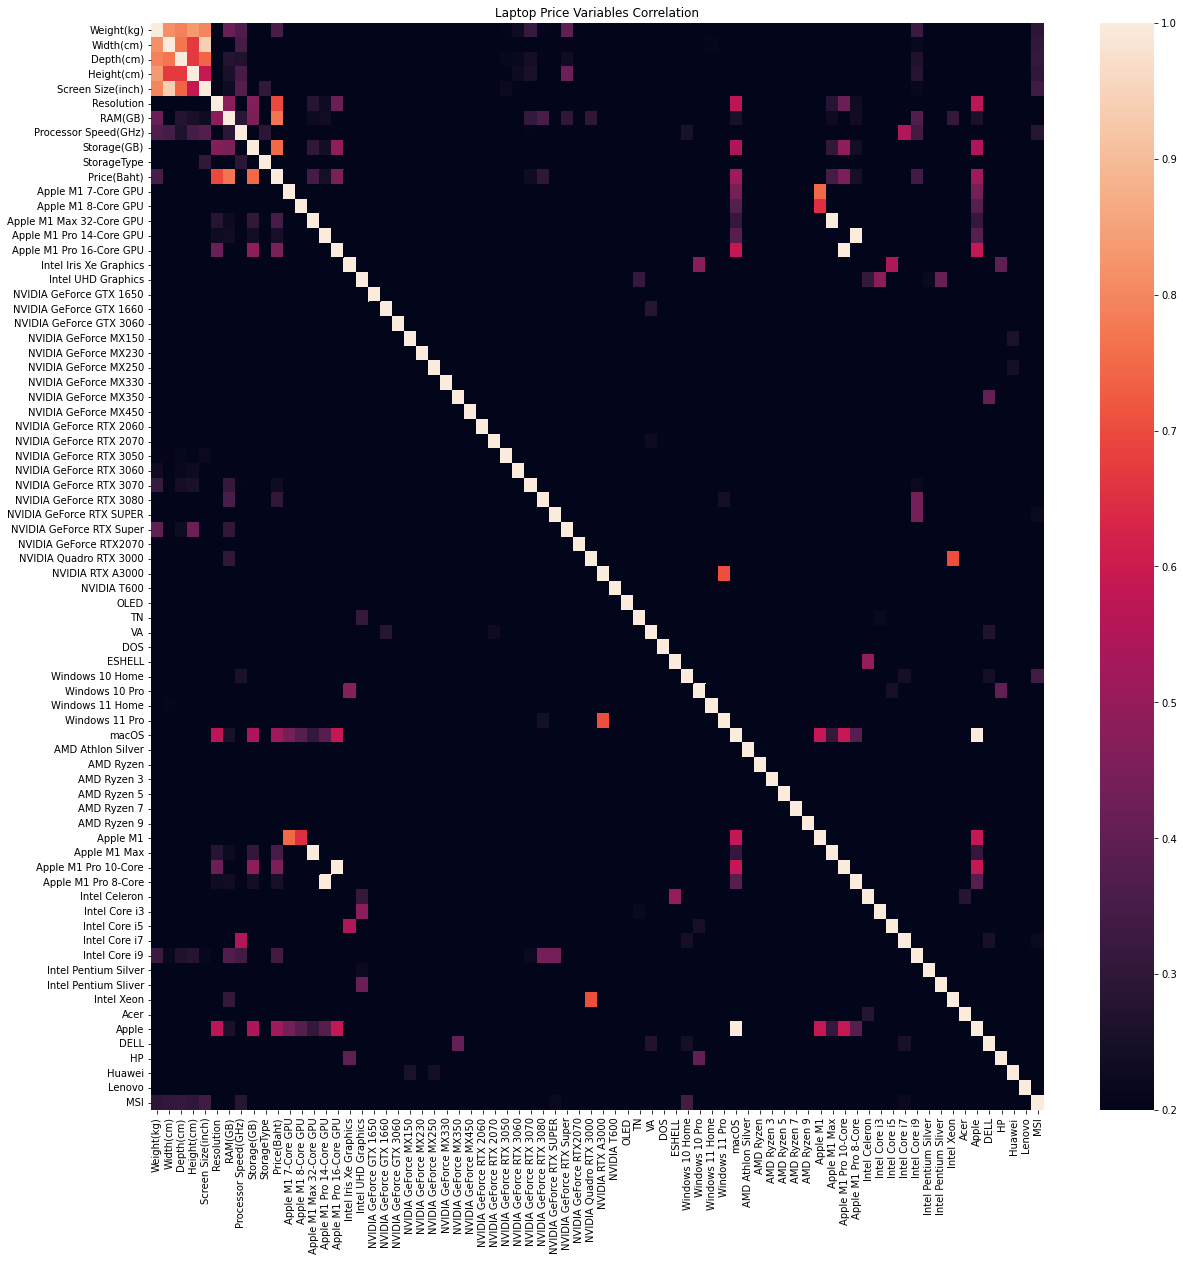

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(lt_predict.corr(), vmin=0.2, ax=ax)
plt.title('Laptop Price Variables Correlation')

In [ ]:
lt_predict.drop(['Width(cm)',
                 'Height(cm)',
                 'StorageType'
                 ], axis = 1, inplace = True)
lt_predict.head()

,Weight(kg),Depth(cm),Screen Size(inch),Resolution,RAM(GB),Processor Speed(GHz),Storage(GB),Price(Baht),Apple M1 7-Core GPU,Apple M1 8-Core GPU,...,Intel Pentium Silver,Intel Pentium Sliver,Intel Xeon,Acer,Apple,DELL,HP,Huawei,Lenovo,MSI
0,2.2,24.81,16.2,12,32,4.0,2000,138900,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2.2,24.81,16.2,12,32,4.0,1000,124900,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.1,24.81,16.2,12,16,3.4,1000,96900,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2.1,24.81,16.2,12,16,3.4,512,89900,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.6,22.12,14.2,9,16,3.4,2000,103900,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = lt_predict[['Weight(kg)',
                'Depth(cm)',
                'Screen Size(inch)',
                'Resolution',
                'RAM(GB)',
                'Processor Speed(GHz)',
                'Storage(GB)'
                ]]
y = lt_predict['Price(Baht)'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(345, 7)
(345, 1)


**4. Data splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    random_state=90)

In [ ]:
x_scale = MinMaxScaler()
X_train = x_scale.fit_transform(X_train)
X_test = x_scale.transform(X_test)

y_scale = MinMaxScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

5. Applying MLPRegressor Model

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(100,52),
                   activation='relu',
                   random_state=90)
mlp.fit(X_train, y_train)

y_pred_test = mlp.predict(X_test)
y_pred_test = y_pred_test.reshape(-1,1)
y_pred_train = mlp.predict(X_train)
y_pred_train = y_pred_train.reshape(-1,1)

y_pred_inv = y_scale.inverse_transform(y_pred_test)
y_test_inv = y_scale.inverse_transform(y_test)
y_pred_inv_tr = y_scale.inverse_transform(y_pred_train)
y_pred_inv = y_scale.inverse_transform(y_pred_test)
y_train_inv = y_scale.inverse_transform(y_train)

# Performance and Overfitting
r2_test = cross_val_score(mlp, X_test, y_test, scoring='r2', cv=5)
r2_test_score = r2_test.mean()
r2_train = cross_val_score(mlp, X_train, y_train, scoring='r2', cv=5)
r2_train_score = r2_train.mean()

# Output
print('Performance score of test set: ' + str(r2_test_score))
print('Performance score of train set: ' + str(r2_train_score))
gap = r2_train_score-r2_test_score
print('Overfitting?: ' + str(gap))

Performance score of test set: 0.8418746497560896
Performance score of train set: 0.8623152604438928
Overfitting?: 0.02044061068780323


In [ ]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 52),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 90,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# **Loss Curve**

In [ ]:
loss = mlp.loss_curve_
lossdf = pd.DataFrame(data = ([loss]), index = ['loss']).transpose()
lossdf.head()

,loss
0,0.016210
1,0.013500
2,0.011162
3,0.009422
4,0.007769


Text(0.5, 1.0, 'Loss Curve hidden_layer_sizes=(150,75)')

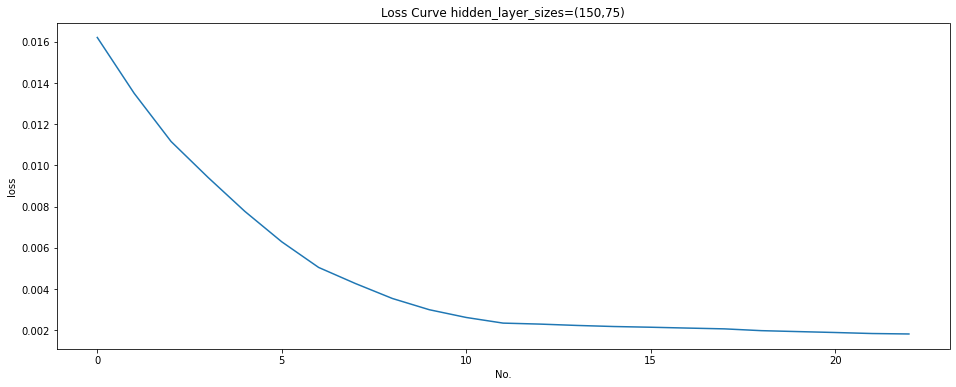

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(lossdf['loss'])

plt.xlabel('No.')
plt.ylabel('loss')
plt.title('Loss Curve hidden_layer_sizes=(150,75)')

# Actual & Predicted Price

In [ ]:
actual = np.concatenate((y_test_inv, y_train_inv), axis=None)
predict = np.concatenate((y_pred_inv, y_pred_inv_tr), axis=None)
pricedf = pd.DataFrame(data = ([actual, predict]), index = ['actual', 'predict']).transpose()

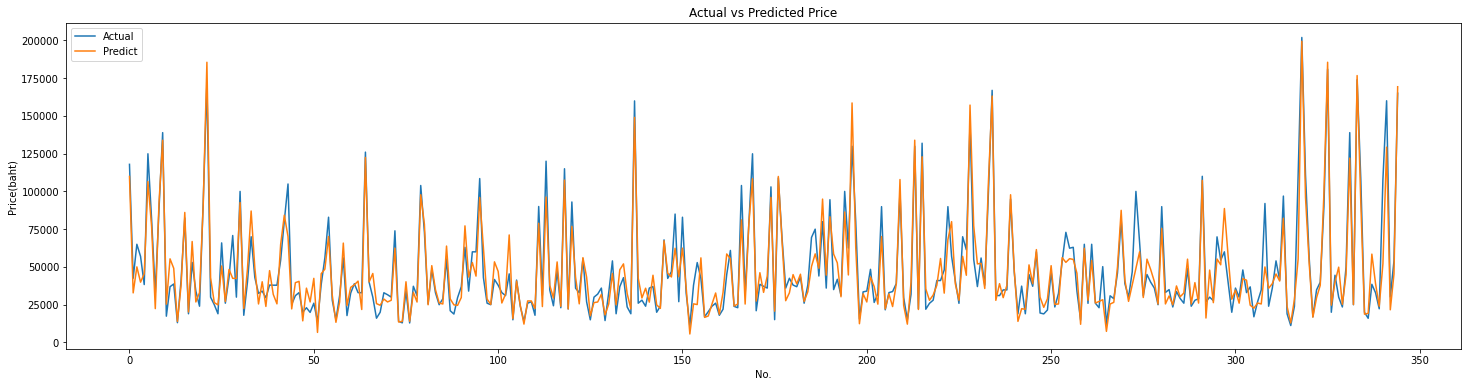

In [ ]:
plt.figure(figsize=(25,6))

plt.plot(pricedf['actual'])
plt.plot(pricedf['predict'])
plt.xlabel('No.')
plt.ylabel('Price(baht)')
plt.title('Actual vs Predicted Price')
plt.legend(['Actual', 'Predict'], loc='upper left')

# **Test**

In [ ]:
laptop = pd.DataFrame([
    {
        'Weight(kg)': 1.31,
        'Depth(cm)': 19.46,
        'Screen Size(inch)': 13.3,
        'Resolution': 1,
        'RAM(GB)': 16,
        'Processor Speed(GHz)': 4.2,
        'Storage(GB)': 512
    }
])
X_cus = laptop[['Weight(kg)',
                'Depth(cm)',
                'Screen Size(inch)',
                'Resolution',
                'RAM(GB)',
                'Processor Speed(GHz)',
                'Storage(GB)']]
X_cus = x_scale.transform(X_cus)
y_pred = mlp.predict(X_cus)
y_pred = y_pred.reshape(-1,1)
price_prediction = y_scale.inverse_transform(y_pred)
print('Price: 33990 baht\n' + 'Predicted Price: %d baht' % price_prediction)
diff = price_prediction-33990
print('Difference: %d baht' % diff)

Price: 33990 baht
Predicted Price: 40173 baht
Difference: 6183 baht


In [ ]:
laptop = pd.DataFrame([
    {
        'Weight(kg)': 1.65,
        'Depth(cm)': 23.65,
        'Screen Size(inch)': 15.6,
        'Resolution': 1,
        'RAM(GB)': 4,
        'Processor Speed(GHz)': 4.1,
        'Storage(GB)': 1000
    }
])
X_cus = laptop[['Weight(kg)','Depth(cm)','Screen Size(inch)','Resolution','RAM(GB)','Processor Speed(GHz)','Storage(GB)']]
X_cus = x_scale.transform(X_cus)
y_pred = mlp.predict(X_cus)
y_pred = y_pred.reshape(-1,1)
price_prediction = y_scale.inverse_transform(y_pred)
print('Price: 17390 baht\n' + 'Predicted Price: %d baht' % price_prediction)
diff = price_prediction-17390
print('Difference: %d baht' % diff)

Price: 17390 baht
Predicted Price: 25356 baht
Difference: 7966 baht


In [ ]:
laptop = pd.DataFrame([
    {
        'Weight(kg)': 2.1,
        'Depth(cm)': 24.8,
        'Screen Size(inch)': 15.6,
        'Resolution': 13,
        'RAM(GB)': 64,
        'Processor Speed(GHz)': 5,
        'Storage(GB)': 2000
    }
])
X_cus = laptop[['Weight(kg)','Depth(cm)','Screen Size(inch)','Resolution','RAM(GB)','Processor Speed(GHz)','Storage(GB)']]
X_cus = x_scale.transform(X_cus)
y_pred = mlp.predict(X_cus)
y_pred = y_pred.reshape(-1,1)
price_prediction = y_scale.inverse_transform(y_pred)
print('Price: 164990 baht\n' + 'Predicted Price: %d baht' % price_prediction)
diff = price_prediction-164990
print('Difference: %d baht' % abs(diff))

Price: 164990 baht
Predicted Price: 169281 baht
Difference: 4291 baht
